In [1]:
# Imports - Generic
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Paths
import sys
sys.path.insert(0, "/Users/chris/Documents/ProjectSigma/VelocityDispersion/")
sys.path.insert(0, "/Users/chris/Documents/ProjectSigma/GalaxyTools/")

# Imports - Local
from SigmaNumeric2 import *
from SigmaLib import Sigma
from GenerateParameters import *
from SDSSExtractor import *
import HM2SM

# Imports - Astro
from colossus.halo import profile_nfw
from colossus.halo import concentration
from colossus.cosmology import cosmology

# Set cosmology
cosmo = cosmology.setCosmology("planck18")

In [2]:
# Get obj that contains the matrix functions
file = open("../SigmaNumeric.pkl",'rb')
SigmaNumeric = pickle.load(file)
file.close()

In [3]:
length = 10
mstar = np.linspace(8,  11, length)

print(mstar)

z = 0

#mhalo = 6 * np.ones(length) 
mhalo = HM2SM.stellar_mass_to_halo_mass(mstar, z, formula="Moster", mdef='200c')

print('mhalo', mhalo)

re, n, rs, rho = GetDefaultParameters(mstar, z, mhalo)

#n[n < 0.5] = 0.5

c = concentration.concentration((10**mhalo)*cosmo.h, '200c', z=z, model = 'ishiyama20')

print("n:", n)
print("c:", c)
print("re:", re)

#n = 4 *np.ones(length)

#re = 4 * np.ones(length)


ap_re = 1./8
beta = 0.49* np.ones(length)

sigma_full = Sigma(ap_re * re,
                    Bulge_mass = mstar,
                      Bulge_Re = re,
                       Bulge_n = n,
                    Bulge_Beta= beta,
               DarkMatter_type='NFW',
                        HaloRs=rs,
                      HaloRhos=rho,
                         debug=True,
                       threads=8,
                    library_path = "../lib/libsigma.so")

sigma_approx = SigmaNumeric.SigmaNumeric(mstar, re, n, beta, mhalo, z, dm = 'NFW')

[ 8.          8.33333333  8.66666667  9.          9.33333333  9.66666667
 10.         10.33333333 10.66666667 11.        ]
mhalo [10.56675175 10.70848681 10.84906806 10.99123123 11.14040759 11.30335929
 11.49993946 11.7760011  12.2228066  12.86390574]
n: [1.61910044 1.66050772 1.75609067 1.90461741 2.10687705 2.36405249
 2.67594615 3.03889578 3.44340635 3.87177962]
c: [11.6067263  11.26750814 10.93333078 10.59767023 10.24793805  9.86892638
  9.4161889   8.7956782   7.83795129  6.55930535]
re: [1.05428281 1.09158767 1.1334942  1.18426416 1.25322852 1.36061919
 1.54935554 1.90713356 2.60447634 3.95867064]
Length of arrays:  10
Component array [stars, dark_matter, black_hole]  [1, 1, 0]
    Assigning Concentration
    Assigning DM parameters
    Generating K, L and M
        Generating K
        Generating L
        Generating M
    Bringing it all together


In [4]:
print(SigmaNumeric.n_domain_Ky)

[0.2        0.66315789 1.12631579 1.58947368 2.05263158 2.51578947
 2.97894737 3.44210526 3.90526316 4.36842105 4.83157895 5.29473684
 5.75789474 6.22105263 6.68421053 7.14736842 7.61052632 8.07368421
 8.53684211 9.        ]


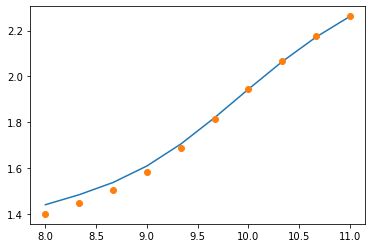

In [5]:
plt.figure()
plt.plot(mstar, np.log10(sigma_full))
plt.plot(mstar, np.log10(sigma_approx), 'o')
plt.show()

In [6]:
print('0.25 & $')
SigmaNumeric.K_LaTeX_markup()
print("$ & $")
SigmaNumeric.L_LaTeX_markup()
print("$ & $")
SigmaNumeric.M_LaTeX_markup()
print("$ \\\ ")

0.25 & $
\begin{array}{c|c}
n & \mathcal{K} \\ 
0.2 & 0.73 \\ 
0.6631578947368422 & 2.2 \\ 
1.1263157894736844 & 2.78 \\ 
1.5894736842105264 & 2.89 \\ 
2.0526315789473686 & 2.76 \\ 
2.515789473684211 & 2.56 \\ 
2.978947368421053 & 2.34 \\ 
3.4421052631578952 & 2.14 \\ 
3.9052631578947374 & 1.96 \\ 
4.36842105263158 & 1.8 \\ 
4.831578947368421 & 1.66 \\ 
5.294736842105264 & 1.53 \\ 
5.757894736842106 & 1.42 \\ 
6.2210526315789485 & 1.32 \\ 
6.68421052631579 & 1.23 \\ 
7.147368421052633 & 1.15 \\ 
7.610526315789475 & 1.08 \\ 
8.073684210526316 & 1.01 \\ 
8.536842105263158 & 0.95 \\ 
9.0 & 0.9 \\ 
\end{array}
$ & $
\begin{array}{cccccccccccccccccccccc}
 &  &  &  &  &  &  &  &  &  &  & c &  &  &  &  &  &  &  &  &  & \\ 
 &  & 1.0 & 3.58 & 6.16 & 8.74 & 11.32 & 13.89 & 16.47 & 19.05 & 21.63 & 24.21 & 26.79 & 29.37 & 31.95 & 34.53 & 37.11 & 39.68 & 42.26 & 44.84 & 47.42 & 50.0 \\ 
 & 0.2 & 1.01 & 1.06 & 1.09 & 1.12 & 1.15 & 1.17 & 1.19 & 1.21 & 1.23 & 1.25 & 1.26 & 1.27 & 1.29 & 1.3 & 1.31 &